# Probably Interesting Data
 - Dalton Hahn (2762306) and Ron Andrews (1083734)
## Audio features of songs ranging from 1922 to 2011

### Build a heuristic to model the data using mixture models of probability distributions programmatically
https://www.kaggle.com/uciml/msd-audio-features



## Madness Method
We will first investigate the data available in the kaggle dataset for Timbre from various songs over time to identify the trends in the data - looking for interesting features in the data.
Once we have determined the values of focus, we will normalize the data using a Guassian Normal Distribution Function.
With the normalized model data, we will plot the values, looking for interesting trends in the data. We will remove data that is uninteresting (few characteristics) or which go out of bounds from the more 'normal' dataset.
At the end, with our final collection of data parameters, we will plot a mean function against the data to see where the moderate pattern lies.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import math
from statistics import mean, stdev

## Read in the data

In [2]:
df = pd.read_csv("../data/external/audio-features-of-songs-ranging-from-1922-to-2011.zip", compression="zip")

In [3]:
df.head(1)

,label,TimbreAvg1,TimbreAvg2,TimbreAvg3,TimbreAvg4,TimbreAvg5,TimbreAvg6,TimbreAvg7,TimbreAvg8,TimbreAvg9,...,TimbreCovariance69,TimbreCovariance70,TimbreCovariance71,TimbreCovariance72,TimbreCovariance73,TimbreCovariance74,TimbreCovariance75,TimbreCovariance76,TimbreCovariance77,TimbreCovariance78
0,2001,49.94357,21.47114,73.0775,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.0162,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327


## Feature Engineering

In [4]:
df[df.columns[0]].unique()

array([2001, 2007, 2008, 2002, 2004, 2003, 1999, 1992, 1997, 1987, 2000,
       2005, 1996, 1998, 2009, 2006, 1993, 1991, 1933, 1930, 1935, 1995,
       1941, 1990, 1943, 1994, 1974, 1976, 1975, 1970, 1971, 1981, 1989,
       1969, 1972, 1973, 1983, 2010, 1985, 1988, 1979, 1980, 1986, 1958,
       1978, 1968, 1962, 1967, 1982, 1984, 1961, 1966, 1964, 1960, 1965,
       1963, 1977, 1942, 1945, 1955, 1926, 1927, 1957, 1959, 1956, 1954,
       1928, 1948, 1922, 1952, 1953, 1944, 1946, 1949, 1950, 1939, 1932,
       1938, 1937, 1936, 1940, 1951, 1929, 1934, 1947, 1931, 1925, 1924,
       2011])

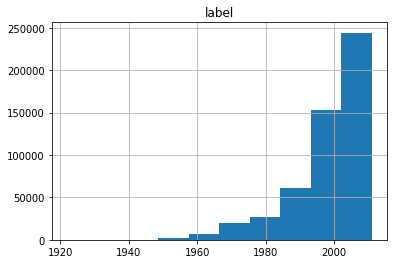

In [5]:
hist = df.hist(column = df.columns[0])

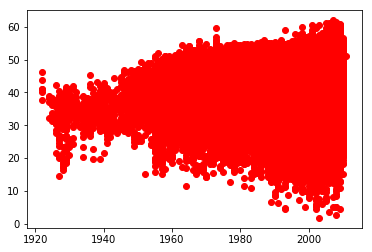

In [6]:
plt.plot(df['label'], df['TimbreAvg1'], 'ro')
plt.show()

Based on observation from distribution of songs over years, we plan to trim dataset to focus on solely songs produced in the year 2000 or later.  This still provides us a large amount of data to work with.

In [7]:
df2 = df[['label', 'TimbreAvg1']].copy()

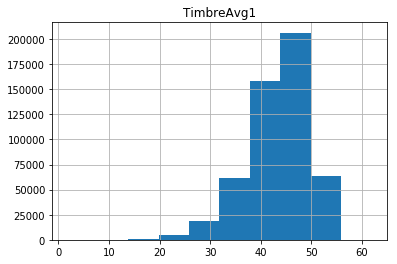

In [8]:
hist2 = df2.hist(column = df2.columns[1])

## Mixture Models of PDF

#### Guassian Transformation
The following function, gauss_transform, goes through the dataset and normalizes all of the values using a Gaussian distribution function: 
$\Large \mathcal{N}(x|\mu,\sigma^2) = \frac{1}{\sigma \sqrt{2 \pi}}    e^{-\frac{(x - \mu)^2}{2 (\mu^2)}}$

In [9]:
def gauss_transform(col):
    print(col)
    result_arr = []
    
    mu = mean(col)
    sig = stdev(col)
    frac_part = 1/(sig*math.sqrt(2*math.pi))
    for val in col:
        exponent_part = ((val - mu)**2) / (2*(mu**2)) * -1
        result_arr.append(frac_part * math.exp(exponent_part))
        
    return result_arr
        

#### Gaussian Averaging
Given a Gaussian Distribution Function, the following function will compress the data into decades for easier visualization. This binning is done due to looking at the unbinned data and needing to smooth the trends. By processing the data by ordered element and combining data points that fall within the same decade (i.e. - 2001, 2002, 2003, etc.), we can create a much smoother graph for making observations about the data.

In [10]:
def goGausAveGraph(gaus_plot, i):
    gaus_graph = gaus_plot.groupby('Year').mean()

    gaus_sorted = gaus_plot.sort_values(['Year'], ascending=True)

    #print(gaus_sorted['TA1'], gaus_sorted['Year'])
    #data = gaus_sorted['TA1'].values.tolist()

    counter = 0
    decade_index = 0
    dec_flag = 0
    results = [0 for _ in range(10)]
    year_list = [x for x in range(1920, 2011, 10)]
    for year, val in gaus_sorted.values:
        if year % 10 and dec_flag == 0:
            counter += 1
            results[decade_index] += val
        elif year % 10 == 0 or dec_flag == 0:
            dec_flag = 1
            counter += 1
            results[decade_index] += val
        else:
            results[decade_index] /= counter
            decade_index += 1
            dec_flag = 0
            counter = 1
            results[decade_index] += val
    gaus_decades = pd.DataFrame({'Year': year_list, 'TA'+str(i): results})
    return gaus_decades

In [11]:
gaus_plots = []
timbre = 'TimbreAvg'
timbre_aves = [timbre+str(i) for i in range(1,10)]
counter = 1
for tave in timbre_aves:
    gaus_vals = gauss_transform(df[tave].values.tolist())
    years = df['label'].values.tolist()
    gaus_plot = pd.DataFrame({'Year': years,'TA'+str(timbre_aves.index(tave)): gaus_vals})
    gaus_plots.append(goGausAveGraph(gaus_plot, counter))
    counter += 1

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



x = gaus_plots[3]['Year'].values.tolist()
y = gaus_plots[3]['TA4'].values.tolist()
y = [y[i]+gaus_plots[2]['TA3'].values.tolist()[i] for i in range(len(y))]
y = [y[i]+gaus_plots[6]['TA7'].values.tolist()[i] for i in range(len(y))]
y = [y[i]/3 for i in range(len(y))]
aveplot = pd.DataFrame({'Year': x,'AVE': y})

NameError: name 'aveplot' is not defined

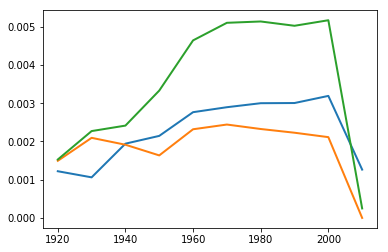

In [12]:
for i in range(1,len(gaus_plots)):
    if i in [1,4,5,7,8]:
        continue
    TA = 'TA'+str(i+1)
    gplot = gaus_plots[i]
    plt.plot( 'Year', str(TA), data=gplot, marker='', linewidth=2)
    
plt.plot( 'Year', 'AVE', data=aveplot, marker='', linewidth=4)
plt.legend()
plt.show()


#### Conclusion
In the above graphs, we have eliminated data that was either an outlier or that did not follow an interesting trend that we noticed developing in the dataset.  By plotting the three normalized features together in the above graph, we then applied an average across all three features to establish a trend baseline for describing the observed trend.  As an observation of our final data, the instruments/styles that these timbres represent fell out of popularity entering the 2000's and beyond.